In [1]:
# Required Packages

import numpy as np
import pandas as pd

# Display
from colorama import Fore, Back, Style

# Pytorch
import torch
from torch.autograd import Variable
import torch.nn as nn 
import torchvision.transforms as transforms
# Plots

import matplotlib.pyplot as plt

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Tensor and Matrices

Roughly speaking, a tensor is often referred to as an object that describes a relationship between a set of vector space objects. Similarly, in PyTorch mathematical matrices are called **tensors**.

For example,

In [2]:
A = np.random.randint(10, size=(3, 3))
A

array([[5, 6, 6],
       [4, 3, 7],
       [3, 7, 9]])

is a array. However,

In [3]:
T = torch.Tensor(A)
T

tensor([[5., 6., 6.],
        [4., 3., 7.],
        [3., 7., 9.]])

is a tensor.

In [4]:
pd.DataFrame({'Object':['A','B'], 'Type': [type(A), type(T)], 'Shape': [A.shape, T.shape]}).style.hide_index()

Object,Type,Shape
A,,"(3, 3)"
B,,"torch.Size([3, 3])"


There are a lot of similarities between numpy and torch. For example, we could

In [5]:
T = torch.randint(10, size=(3, 3))
T

tensor([[0, 7, 5],
        [0, 5, 3],
        [3, 1, 3]])

In [6]:
A = np.array(T)
A

array([[0, 7, 5],
       [0, 5, 3],
       [3, 1, 3]], dtype=int64)

Some other similarities:

In [7]:
print(Fore.BLUE+ Style.BRIGHT + 'Numpy ones:')
display(np.ones((2,2)))

print(Fore.RED+ Style.BRIGHT + 'Toruch ones:')
display(torch.ones((2,2)))

print(Fore.BLUE+ Style.BRIGHT + 'Array to Tensor:')
display(np.asarray(T))

print(Fore.RED+ Style.BRIGHT + 'Array to Tensor:')
display(torch.from_numpy(A))

Numpy ones:


array([[1., 1.],
       [1., 1.]])

Toruch ones:


tensor([[1., 1.],
        [1., 1.]])

Array to Tensor:


array([[0, 7, 5],
       [0, 5, 3],
       [3, 1, 3]], dtype=int64)

Array to Tensor:


tensor([[0, 7, 5],
        [0, 5, 3],
        [3, 1, 3]])

See this [link](https://pytorch.org/tutorials/) for more details.

## Basic (matrix) algebra with torch

Let $S$ and $T$ be two tensors

In [8]:
S = torch.randint(10, size=(4, 4))
T = torch.randint(10, size=(4, 4))
print(Fore.BLUE+ Style.BRIGHT + 'S=')
display(S)

print(Fore.RED+ Style.BRIGHT + 'T=')
display(T)

S=


tensor([[4, 2, 8, 3],
        [6, 6, 0, 9],
        [9, 2, 4, 8],
        [2, 0, 7, 7]])

T=


tensor([[3, 6, 7, 5],
        [4, 6, 7, 6],
        [9, 0, 8, 8],
        [7, 9, 4, 2]])

* **Addition**: ```torch.add(S,T)``` or ```S.add(T)```or ```S + T```
* **Subtraction**: ```torch.sub(S,T)``` or```S.sub(T)``` or  ```S - T```
* **Element wise Multiplication**: ```torch.mul(S,T)``` or  ```S * T ```
* **Element wise Division**: ```torch.div(S,T)``` or ```S / T ```

In [9]:
print(Fore.BLUE+ Style.BRIGHT + 'Addition:')
display(torch.add(S,T))
display(S.add(T))
display(S+T)

Addition:


tensor([[ 7,  8, 15,  8],
        [10, 12,  7, 15],
        [18,  2, 12, 16],
        [ 9,  9, 11,  9]])

tensor([[ 7,  8, 15,  8],
        [10, 12,  7, 15],
        [18,  2, 12, 16],
        [ 9,  9, 11,  9]])

tensor([[ 7,  8, 15,  8],
        [10, 12,  7, 15],
        [18,  2, 12, 16],
        [ 9,  9, 11,  9]])

In [10]:
print(Fore.BLUE+ Style.BRIGHT + 'Subtraction:')
display(torch.sub(S,T))
display(S.sub(T))
display(S-T)

Subtraction:


tensor([[ 1, -4,  1, -2],
        [ 2,  0, -7,  3],
        [ 0,  2, -4,  0],
        [-5, -9,  3,  5]])

tensor([[ 1, -4,  1, -2],
        [ 2,  0, -7,  3],
        [ 0,  2, -4,  0],
        [-5, -9,  3,  5]])

tensor([[ 1, -4,  1, -2],
        [ 2,  0, -7,  3],
        [ 0,  2, -4,  0],
        [-5, -9,  3,  5]])

In [11]:
print(Fore.BLUE+ Style.BRIGHT + 'Element wise Multiplication:')
display(torch.mul(S,T))
display(S.mul(T))
display(S*T)

Element wise Multiplication:


tensor([[12, 12, 56, 15],
        [24, 36,  0, 54],
        [81,  0, 32, 64],
        [14,  0, 28, 14]])

tensor([[12, 12, 56, 15],
        [24, 36,  0, 54],
        [81,  0, 32, 64],
        [14,  0, 28, 14]])

tensor([[12, 12, 56, 15],
        [24, 36,  0, 54],
        [81,  0, 32, 64],
        [14,  0, 28, 14]])

In [12]:
print('Element wise Division:')
print('- Dividing each entry of S by 2:')

Element wise Division:
- Dividing each entry of S by 2:


In [13]:
torch.div(S,2)

tensor([[2, 1, 4, 1],
        [3, 3, 0, 4],
        [4, 1, 2, 4],
        [1, 0, 3, 3]])

In [14]:
print('- Dividing each entry of S by corresponding entry of T:')

- Dividing each entry of S by corresponding entry of T:


In [15]:
# Sometimes the kernel dies after running the following commands
# torch.div(S,T)
# display(S.div(T))
# display(S/T)

## Mean, Standart Deviation and Mode

Let $T$ be a tensor.

* Mean: ```T.mean()```
* Standart Deviation (std): ```T.std()```

In [16]:
T = torch.rand(4,4)
print(Fore.RED+ Style.BRIGHT + 'T:')
display(T)
print(Fore.RED+ Style.BRIGHT + 'Mean:')
display(T.mean())

print(Fore.RED+ Style.BRIGHT + 'STD:')
display(T.std())

T:


tensor([[0.5965, 0.1605, 0.9713, 0.5316],
        [0.1033, 0.8196, 0.5195, 0.2683],
        [0.9976, 0.7016, 0.7974, 0.1061],
        [0.0694, 0.5603, 0.0042, 0.2236]])

Mean:


tensor(0.4644)

STD:


tensor(0.3351)

See more details [here](https://pytorch.org/docs/stable/torch.html).

## Linear Regression

Let's try a linear regression using Pytorch.

To do a linear regression using Pytorch, we need to do the following steps.

1. Defining a class for **LinearRegression**. This class is common when it comes to doing linear regression using Pytorch.

In [17]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_Size, output_Size):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_Size, output_Size)

    def forward(self, x):
        out = self.linear(x)
        return out

2. Preparing the data and defining a model using the **LinearRegression** class.

---------------------------------------------------------
Step = 0, MSE = 2.5821e+02
Step = 10, MSE = 2.9656e-01
Step = 20, MSE = 2.4751e-01
Step = 30, MSE = 2.0909e-01
Step = 40, MSE = 1.7663e-01
Step = 50, MSE = 1.4921e-01
Step = 60, MSE = 1.2605e-01
Step = 70, MSE = 1.0648e-01
Step = 80, MSE = 8.9954e-02
Step = 90, MSE = 7.5990e-02
Step = 100, MSE = 6.4194e-02
---------------------------------------------------------


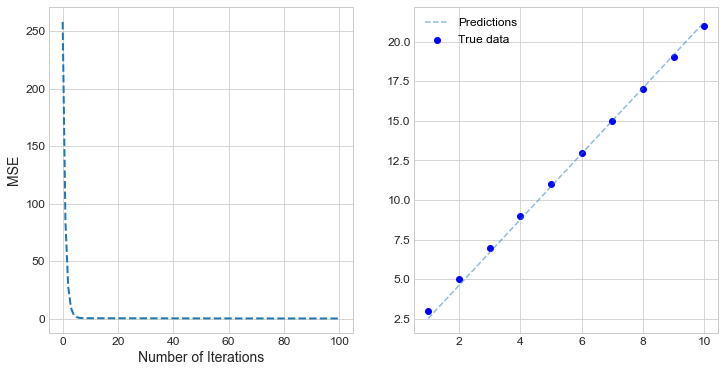

In [18]:
N = 10
X = np.linspace(1,N,N)
X = np.array(X,dtype=np.float32)
X = X.reshape(-1,1)
# y = 2x +1
y = np.dot(X,2) +1
y = np.array(y,dtype=np.float32)
y = y.reshape(-1,1)

if torch.cuda.is_available():
    X_tensor = Variable(torch.from_numpy(X).cuda())
    y_tensor = Variable(torch.from_numpy(y).cuda())
else:
    X_tensor = Variable(torch.from_numpy(X))
    y_tensor = Variable(torch.from_numpy(y))

# Defining model
input_Size, output_Size = 1, 1
model = LinearRegressionModel(input_Size, output_Size) # input and output size are 1

# GPU
if torch.cuda.is_available():
    model.cuda()

# MSE
MSE = nn.MSELoss()

# Optimization
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

loss_list = []
iteration_number = 101
print('---------------------------------------------------------')
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward modeling
    results = model(X_tensor)
    
    # Calculate Loss using MSE
    loss = MSE(results, y_tensor)
    
    # backward
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 10 == 0):
        print('Step = %i, MSE = %.4e' % (iteration, loss.data))
print('---------------------------------------------------------')

with torch.no_grad():
    if torch.cuda.is_available():
        Predicted = model(Variable(torch.from_numpy(X).cuda())).cpu().data.numpy()
    else:
        Predicted = model(Variable(torch.from_numpy(X))).data.numpy()

fig, ax = plt.subplots(1, 2, figsize=(12,6))
_ = ax[0].plot(range(iteration_number), loss_list, linestyle='dashed', linewidth=2)
_ = ax[0].set_xlabel("Number of Iterations")
_ = ax[0].set_ylabel("MSE")
    
_ = ax[1].scatter(X, y, label='True data', alpha=1, facecolor='blue')
_ = ax[1].plot(X, Predicted, '--', label='Predictions', alpha=0.5)
_ = ax[1].legend(loc='Best', fontsize=12)

***